# G$_0$W$_0$@PBE

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# Use of LaTeX is optional
usetex = True

# Read JSON file into a Pandas DataFrame
g0w0_df = pd.read_json("df_g0w0.json", orient="split")

# Colors dictionary
colors_dict = {
    'None'  : 'black',
    'A'     : "tab:blue",
    'D'     : "tab:orange",
    'AA'    : "tab:red",
    'AD'    : "tab:green",
    'DD'    : "tab:purple",
    'AAD'   : "tab:brown",
    "ADD"   : "tab:pink",
    "AADD"  : "tab:olive",
    "AAADD" : "black",
}


# Extract data into appropriate Lists
x = [ i+1 for i in range(len(g0w0_df["energies_pbeh"])) for j in g0w0_df["energies_pbeh"][i]]
pbeh = [item for sublist in g0w0_df["energies_pbeh"].values for item in sublist]
g0w0 = [item for sublist in g0w0_df["energies_g0w0"].values for item in sublist]
colors = [colors_dict[item] for sublist in g0w0_df["labels"].values for item in sublist]
labels = g0w0_df["shortname"]

# Escape underscores in labels if usetex = True
if usetex: labels = [item.translate(str.maketrans({"_": r"\_"})) for item in labels]

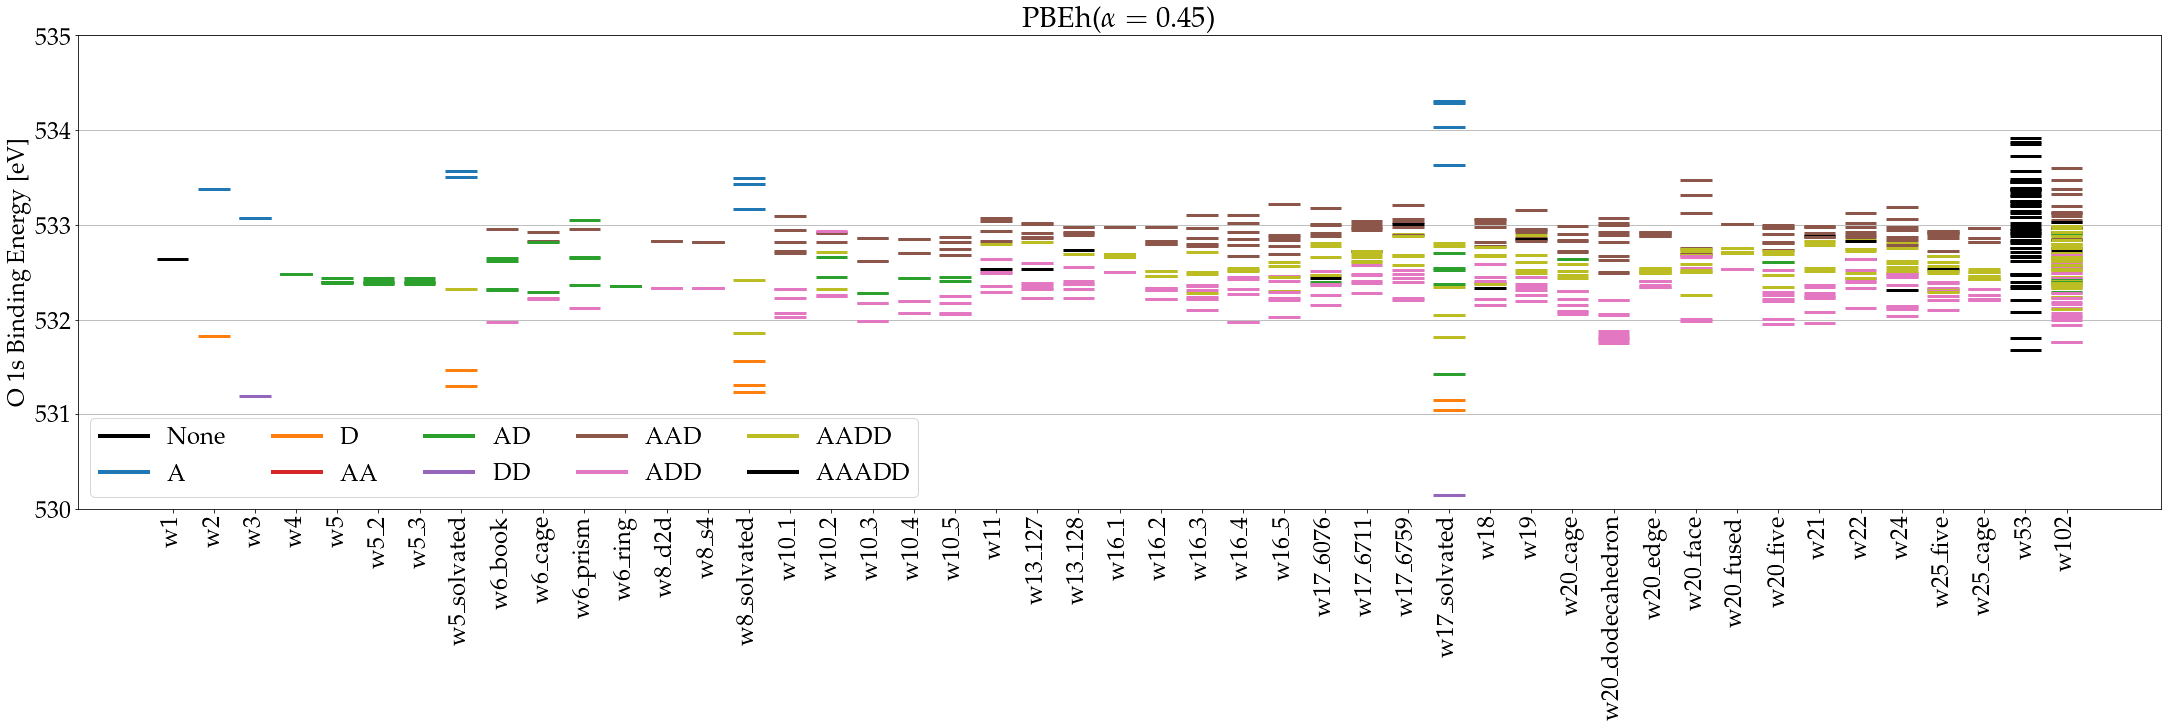

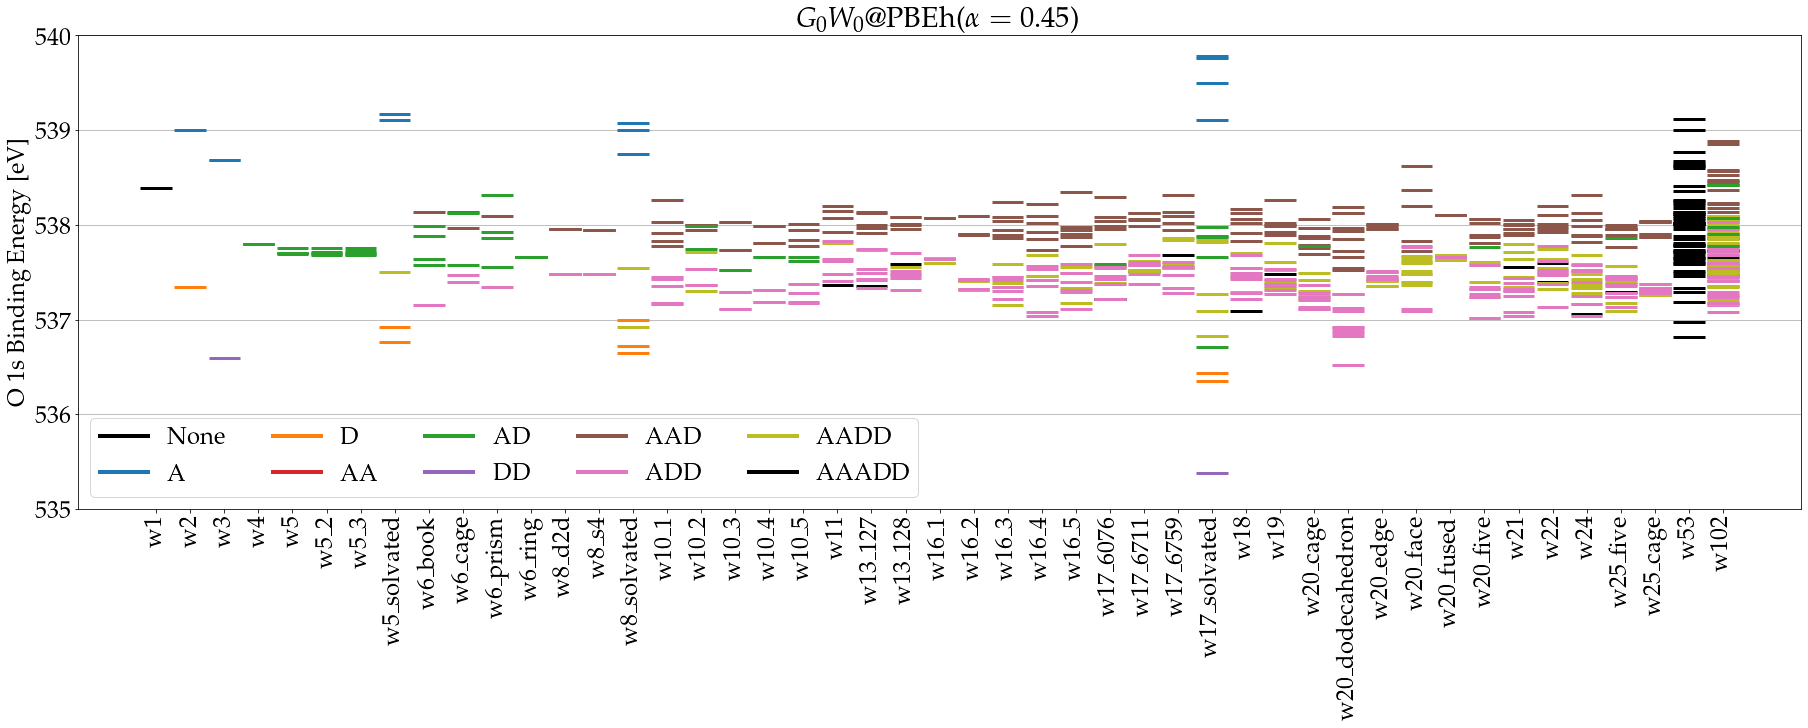

In [63]:
# Plots

plt.rcParams.update({
    "text.usetex": usetex,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    'font.size': 24
})

# Legends
lines = [Line2D([0], [0], color=colors_dict['None'], lw=4),
         Line2D([0], [0], color=colors_dict['A'], lw=4),
         Line2D([0], [0], color=colors_dict['D'], lw=4),
         Line2D([0], [0], color=colors_dict['AA'], lw=4),
         Line2D([0], [0], color=colors_dict['AD'], lw=4),
         Line2D([0], [0], color=colors_dict['DD'], lw=4),
         Line2D([0], [0], color=colors_dict['AAD'], lw=4),
         Line2D([0], [0], color=colors_dict['ADD'], lw=4),
         Line2D([0], [0], color=colors_dict['AADD'], lw=4),
         Line2D([0], [0], color=colors_dict['AAADD'], lw=4)
        ]


# GKS Eigenvalues
fig, ax = plt.subplots(figsize=(30,10),constrained_layout=True)
ax.scatter(x,pbeh,marker='_',s=1000,zorder=3,linewidth=3,color=colors)
ax.set_xticks(range(1,len(g0w0_df)+1))
ax.set_xticklabels(labels,rotation=90)
ax.set_ylabel('O 1s Binding Energy [eV]')
ax.set_title(r'PBEh($\alpha=0.45$)')
ax.set_ylim(530,535)
ax.grid(axis='y')
ax.legend(lines, ['None','A',"D","AA","AD","DD","AAD","ADD","AADD","AAADD"],loc='lower left',ncol=5)
plt.show()

# G_0W_0 Energies
fig, ax = plt.subplots(figsize=(25,10),constrained_layout=True)
ax.scatter(x,g0w0,marker='_',s=1000,zorder=3,linewidth=3,color=colors)
ax.set_xticks(range(1,len(g0w0_df)+1))
ax.set_xticklabels(labels,rotation=90)
ax.set_ylabel('O 1s Binding Energy [eV]')
ax.set_title(r'$G_0W_0$@PBEh($\alpha=0.45$)')
ax.set_ylim(535,540)
ax.grid(axis='y')
ax.legend(lines, ['None','A',"D","AA","AD","DD","AAD","ADD","AADD","AAADD"],loc='lower left',ncol=5)
fig.savefig("g0w0_at_pbeh.pdf",bbox_inches="tight")
plt.show()

In [51]:
# Extract data into appropriate Lists
monomers_labels = ["w1","w5_solvated","w17_solvated", "w53"]
monomers_df = g0w0_df[g0w0_df.shortname.isin(monomers_labels)]
monomers = [item for sublist in monomers_df["energies_g0w0"].values for item in sublist]
xmonomers = [ i+1 for i in range(len(monomers_df["energies_g0w0"])) for j in monomers_df["energies_g0w0"].values[i] ]
monomers_colors = [colors_dict[item] for sublist in monomers_df["labels"].values for item in sublist]

dimers_labels = ["w2","w8_solvated"]
dimers_df = g0w0_df[g0w0_df.shortname.isin(dimers_labels)]
dimers = [item for sublist in dimers_df["energies_g0w0"].values for item in sublist]
xdimers = [ i+1 for i in range(len(dimers_df["energies_g0w0"])) for j in dimers_df["energies_g0w0"].values[i] ]
dimers_colors = [colors_dict[item] for sublist in dimers_df["labels"].values for item in sublist]

fives_labels = ["w11", "w13_127", "w13_128", "w17_6076", "w17_6711", "w17_6759", "w18", "w19", "w20_five", "w21", "w22", "w24", "w25_five", "w102"]
fives_df = g0w0_df[g0w0_df.shortname.isin(fives_labels)]
fives = [item for sublist in fives_df["energies_g0w0"].values for item in sublist]
xfives = [ i+1 for i in range(len(fives_df["energies_g0w0"])) for j in fives_df["energies_g0w0"].values[i] ]
fives_colors = [colors_dict[item] for sublist in fives_df["labels"].values for item in sublist]

# Escape underscores in labels if usetex = True
if usetex: 
    monomers_labels = [item.translate(str.maketrans({"_": r"\_"})) for item in monomers_labels]
    dimers_labels = [item.translate(str.maketrans({"_": r"\_"})) for item in dimers_labels]
    fives_labels = [item.translate(str.maketrans({"_": r"\_"})) for item in fives_labels]

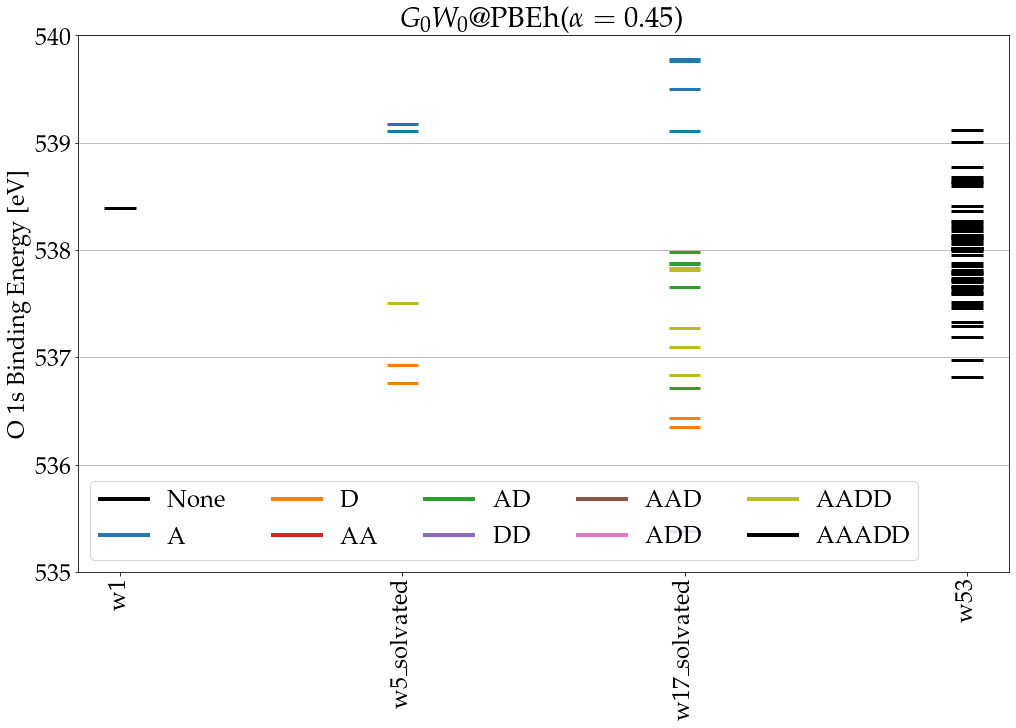

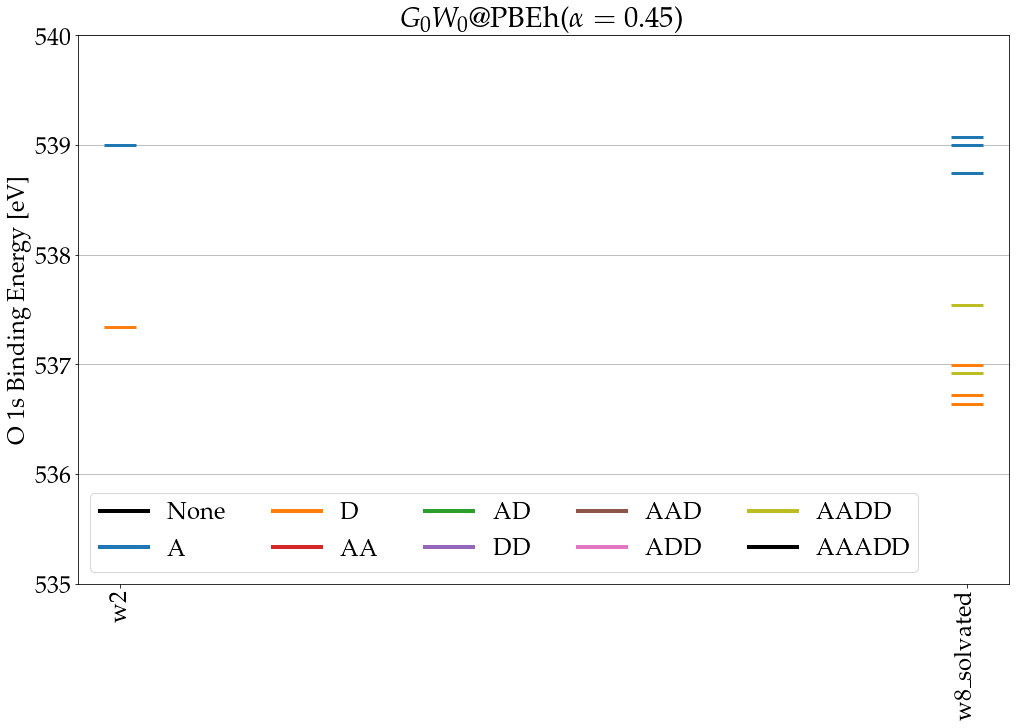

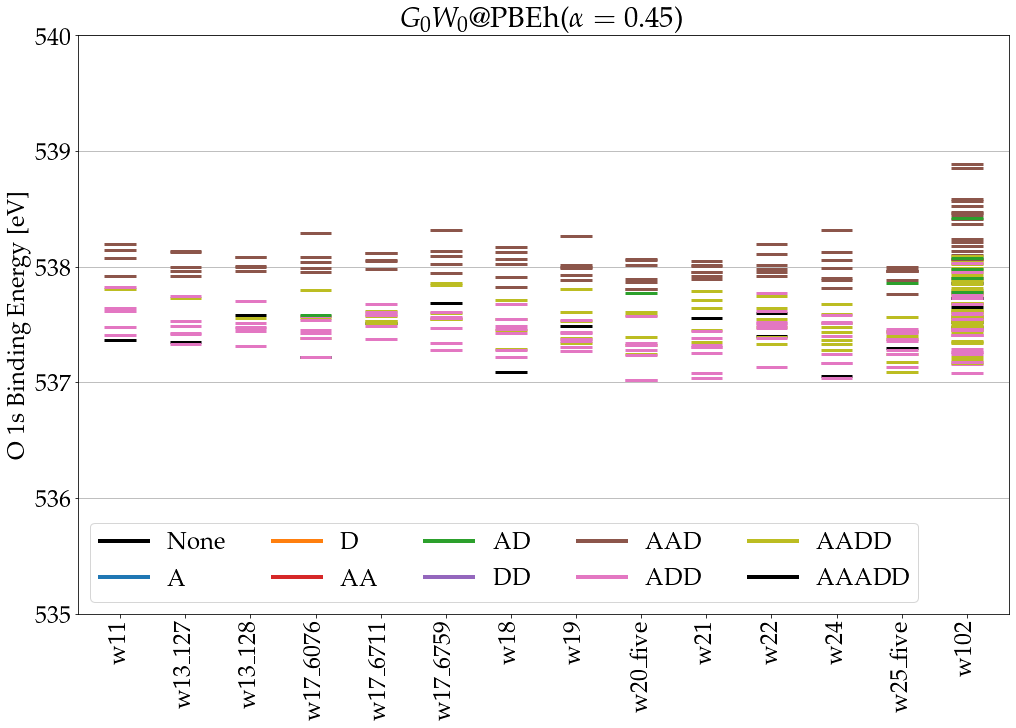

In [64]:
# G_0W_0 Energies
fig, ax = plt.subplots(figsize=(14,10),constrained_layout=True)
ax.scatter(xmonomers,monomers,marker='_',s=1000,zorder=3,linewidth=3,color=monomers_colors)
ax.set_xticks(range(1,len(monomers_df)+1))
ax.set_xticklabels(monomers_labels,rotation=90)
ax.set_ylabel('O 1s Binding Energy [eV]')
ax.set_title(r'$G_0W_0$@PBEh($\alpha=0.45$)')
ax.set_ylim(535,540)
ax.grid(axis='y')
ax.legend(lines, ['None','A',"D","AA","AD","DD","AAD","ADD","AADD","AAADD"],loc='lower left',ncol=5)
fig.savefig("monomers_g0w0_at_pbeh.pdf",bbox_inches="tight")
plt.show()

# G_0W_0 Energies
fig, ax = plt.subplots(figsize=(14,10),constrained_layout=True)
ax.scatter(xdimers,dimers,marker='_',s=1000,zorder=3,linewidth=3,color=dimers_colors)
ax.set_xticks(range(1,len(dimers_df)+1))
ax.set_xticklabels(dimers_labels,rotation=90)
ax.set_ylabel('O 1s Binding Energy [eV]')
ax.set_title(r'$G_0W_0$@PBEh($\alpha=0.45$)')
ax.set_ylim(535,540)
ax.grid(axis='y')
ax.legend(lines, ['None','A',"D","AA","AD","DD","AAD","ADD","AADD","AAADD"],loc='lower left',ncol=5)
fig.savefig("dimers_g0w0_at_pbeh.pdf",bbox_inches="tight")
plt.show()

# G_0W_0 Energies
fig, ax = plt.subplots(figsize=(14,10),constrained_layout=True)
ax.scatter(xfives,fives,marker='_',s=1000,zorder=3,linewidth=3,color=fives_colors)
ax.set_xticks(range(1,len(fives_df)+1))
ax.set_xticklabels(fives_labels,rotation=90)
ax.set_ylabel('O 1s Binding Energy [eV]')
ax.set_title(r'$G_0W_0$@PBEh($\alpha=0.45$)')
ax.set_ylim(535,540)
ax.grid(axis='y')
ax.legend(lines, ['None','A',"D","AA","AD","DD","AAD","ADD","AADD","AAADD"],loc='lower left',ncol=5)
fig.savefig("five_g0w0_at_pbeh.pdf",bbox_inches="tight")
plt.show()

In [28]:
g0w0_df

,filename,shortname,energies_pbeh,energies_g0w0,xyz_indices,mol_indices,labels
0,w1.xyz,w1,[532.638],[538.389],[1],[1],[None]
1,w2.xyz,w2,"[533.38, 531.828]","[539.002, 537.346]","[4, 1]","[2, 1]","[A, D]"
2,w3.xyz,w3,"[533.077, 533.077, 531.192]","[538.68, 538.68, 536.592]","[1, 7, 4]","[1, 3, 2]","[A, A, DD]"
3,w4.xyz,w4,"[532.478, 532.478, 532.478, 532.478]","[537.803, 537.803, 537.803, 537.803]","[1, 4, 7, 10]","[1, 2, 3, 4]","[AD, AD, AD, AD]"
4,w5.xyz,w5,"[532.438, 532.402, 532.398, 532.394, 532.388]","[537.754, 537.706, 537.698, 537.698, 537.693]","[4, 13, 10, 7, 1]","[2, 5, 4, 3, 1]","[AD, AD, AD, AD, AD]"
5,w5_2,w5_2,"[532.44, 532.408, 532.399, 532.388, 532.378]","[537.76, 537.71, 537.7, 537.69, 537.68]","[13, 7, 1, 4, 10]","[5, 3, 1, 2, 4]","[AD, AD, AD, AD, AD]"
6,w5_3,w5_3,"[532.436, 532.411, 532.399, 532.387, 532.376]","[537.76, 537.72, 537.7, 537.69, 537.68]","[10, 13, 7, 1, 4]","[4, 5, 3, 1, 2]","[AD, AD, AD, AD, AD]"
7,w5_solvated_monomer_one_shell_mp2_avtz.xyz,w5_solvated,"[533.568, 533.506, 532.321, 531.467, 531.299]","[539.172, 539.105, 537.505, 536.927, 536.765]","[13, 7, 1, 10, 4]","[5, 3, 1, 4, 2]","[A, A, AADD, D, D]"
8,w6_book.xyz,w6_book,"[532.958, 532.653, 532.615, 532.32, 532.313, 5...","[538.133, 537.988, 537.885, 537.643, 537.58, 5...","[1, 13, 4, 10, 7, 16]","[1, 5, 2, 4, 3, 6]","[AAD, AD, AD, AD, AD, ADD]"
9,w6_cage.xyz,w6_cage,"[532.926, 532.829, 532.815, 532.288, 532.23, 5...","[538.138, 537.968, 538.126, 537.579, 537.466, ...","[1, 10, 13, 16, 4, 7]","[1, 4, 5, 6, 2, 3]","[AAD, AAD, AD, AD, ADD, ADD]"
